<font color='blue'><b>Developing the Base Model</b></font></br>
All the variables were considered in the base model:</br> 
(1) All the categorical data were dummified.</br>
(2) Insignificant variables (p < 0.05) were dropped.</br>
(3) Numeric / scale variables with correlation more than 30% were removed.

In [595]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [596]:
#import processed (clean) data
train = pd.read_csv('./datasets/train_clean.csv')
test = pd.read_csv('./datasets/test_clean.csv')

In [597]:
#drop outliers
outlierindex = train[(train['Id'] == 910)].index
train.drop(outlierindex , inplace=True)
outlierindex = train[(train['Id'] == 1183)].index
train.drop(outlierindex , inplace=True)
outlierindex = train[(train['Id'] == 1499)].index
train.drop(outlierindex , inplace=True)
outlierindex = train[(train['Id'] == 1783)].index
train.drop(outlierindex , inplace=True)

In [598]:
#Computer Age When Sold from Year Built and Yr Sold
train["Age When Sold"] = train["Yr Sold"] - train["Year Built"]
test["Age When Sold"] = test["Yr Sold"] - test["Year Built"]

#Computer Age When Sold from Year Built and Yr Sold
train["Remod When Sold"] = train["Yr Sold"] - train["Year Remod/Add"]
test["Remod When Sold"] = test["Yr Sold"] - test["Year Remod/Add"]

In [599]:
#Selected variables for the training model
X_train = train[["MS SubClass","MS Zoning","Street","Alley","Lot Shape",
                 "Land Contour","Lot Config","Land Slope","Neighborhood",
                 "Condition 1","Condition 2","Bldg Type","House Style","Overall Qual",
                 "Overall Cond","Age When Sold","Remod When Sold","Roof Style","Roof Matl",
                 "Exterior 1st","Exterior 2nd","Mas Vnr Type","Mas Vnr Area",
                 "Exter Qual","Foundation","Bsmt Qual","Bsmt Cond",
                 "BsmtFin Type 1","BsmtFin SF 1","BsmtFin Type 2",
                 "Bsmt Unf SF","Total Bsmt SF","Heating","Heating QC",
                 "Central Air","Electrical","1st Flr SF","Low Qual Fin SF",
                 "Gr Liv Area","Full Bath","Half Bath","Kitchen AbvGr",
                 "Kitchen Qual","TotRms AbvGrd","Functional",
                 "Fireplace Qu","Garage Type","Garage Finish","Garage Cars",
                 "Garage Area","Garage Qual","Garage Cond","Paved Drive",
                 "Open Porch SF","Enclosed Porch","Fence","Misc Feature", 
                 "Sale Type"]]

y_train = train['SalePrice']

#Applied similar processing to the test data
X_test = test[["MS SubClass","MS Zoning","Street","Alley","Lot Shape",
               "Land Contour","Lot Config","Land Slope","Neighborhood",
               "Condition 1","Condition 2","Bldg Type","House Style","Overall Qual",
               "Overall Cond","Age When Sold","Remod When Sold","Roof Style","Roof Matl",
               "Exterior 1st","Exterior 2nd","Mas Vnr Type","Mas Vnr Area",
               "Exter Qual","Foundation","Bsmt Qual","Bsmt Cond",
               "BsmtFin Type 1","BsmtFin SF 1","BsmtFin Type 2",
               "Bsmt Unf SF","Total Bsmt SF","Heating","Heating QC",
               "Central Air","Electrical","1st Flr SF","Low Qual Fin SF",
               "Gr Liv Area","Full Bath","Half Bath","Kitchen AbvGr",
               "Kitchen Qual","TotRms AbvGrd","Functional",
               "Fireplace Qu","Garage Type","Garage Finish","Garage Cars",
               "Garage Area","Garage Qual","Garage Cond","Paved Drive",
               "Open Porch SF","Enclosed Porch","Fence","Misc Feature", 
               "Sale Type"]]

#Create Dummy Variables for MS SubClass (Base for Comparison = 20)
X_train = pd.get_dummies(columns=['MS SubClass'], data=X_train)
X_train = X_train.drop(columns=['MS SubClass_20'])
X_test = pd.get_dummies(columns=['MS SubClass'], data=X_test)
X_test['MS SubClass_150'] = 0
X_test = X_test.drop(columns=['MS SubClass_20'])

#Create Dummy Variables for MS Zoning (Base for Comparison = A (agr))
X_train = pd.get_dummies(columns=['MS Zoning'], data=X_train)
X_train = X_train.drop(columns=['MS Zoning_A (agr)'])
X_test = pd.get_dummies(columns=['MS Zoning'], data=X_test)

#Create Dummy Variables for Street (Base for Comparison = Grvl)
X_train = pd.get_dummies(columns=['Street'], data=X_train)
X_train = X_train.drop(columns=['Street_Grvl'])
X_test = pd.get_dummies(columns=['Street'], data=X_test)
X_test = X_test.drop(columns=['Street_Grvl'])

#Create Dummy Variables for Alley (Base for Comparison = No Alley)
X_train = pd.get_dummies(columns=['Alley'], data=X_train)
X_train = X_train.drop(columns=['Alley_No Alley'])
X_test = pd.get_dummies(columns=['Alley'], data=X_test)
X_test = X_test.drop(columns=['Alley_No Alley'])

#Create Dummy Variables for Lot Shape (Base for Comparison = Reg)
X_train = pd.get_dummies(columns=['Lot Shape'], data=X_train)
X_train = X_train.drop(columns=['Lot Shape_Reg'])
X_test = pd.get_dummies(columns=['Lot Shape'], data=X_test)
X_test = X_test.drop(columns=['Lot Shape_Reg'])

#Create Dummy Variables for Land Contour (Base for Comparison = Lvl)
X_train = pd.get_dummies(columns=['Land Contour'], data=X_train)
X_train = X_train.drop(columns=['Land Contour_Lvl'])
X_test = pd.get_dummies(columns=['Land Contour'], data=X_test)
X_test = X_test.drop(columns=['Land Contour_Lvl'])

#Create Dummy Variables for Lot Config (Base for Comparison = AllPub)
X_train = pd.get_dummies(columns=['Lot Config'], data=X_train)
X_train = X_train.drop(columns=['Lot Config_Inside'])
X_test = pd.get_dummies(columns=['Lot Config'], data=X_test)
X_test = X_test.drop(columns=['Lot Config_Inside'])

#Create Dummy Variables for Land Slope (Base for Comparison = Gtl)
X_train = pd.get_dummies(columns=['Land Slope'], data=X_train)
X_train = X_train.drop(columns=['Land Slope_Gtl'])
X_test = pd.get_dummies(columns=['Land Slope'], data=X_test)
X_test = X_test.drop(columns=['Land Slope_Gtl'])

#Create Dummy Variables for Neighborhood (Base for Comparison = NAmes)
X_train = pd.get_dummies(columns=['Neighborhood'], data=X_train)
X_train = X_train.drop(columns=['Neighborhood_NAmes'])
X_test = pd.get_dummies(columns=['Neighborhood'], data=X_test)
X_test = X_test.drop(columns=['Neighborhood_NAmes'])
X_test['Neighborhood_GrnHill'] = 0
X_test['Neighborhood_Landmrk'] = 0

#Create Dummy Variables for Condition 1 (Base for Comparison = Norm)
X_train = pd.get_dummies(columns=['Condition 1'], data=X_train)
X_train = X_train.drop(columns=['Condition 1_Norm'])
X_test = pd.get_dummies(columns=['Condition 1'], data=X_test)
X_test = X_test.drop(columns=['Condition 1_Norm'])

#Create Dummy Variables for Condition 2 (Base for Comparison = Norm)
X_train = pd.get_dummies(columns=['Condition 2'], data=X_train)
X_train = X_train.drop(columns=['Condition 2_Norm'])
X_test = pd.get_dummies(columns=['Condition 2'], data=X_test)
X_test = X_test.drop(columns=['Condition 2_Norm'])
#Test dataset does not have Artery, PosN, RRAe, RRAn and RRNn, created blank column
X_test['Condition 2_Artery'] = 0
X_test['Condition 2_PosN'] = 0
X_test['Condition 2_RRAe'] = 0
X_test['Condition 2_RRAn'] = 0
X_test['Condition 2_RRNn'] = 0

#Create Dummy Variables for Bldg Type (Base for Comparison = 1Fam)
X_train = pd.get_dummies(columns=['Bldg Type'], data=X_train)
X_train = X_train.drop(columns=['Bldg Type_1Fam'])
X_test = pd.get_dummies(columns=['Bldg Type'], data=X_test)
X_test = X_test.drop(columns=['Bldg Type_1Fam'])

#Create Dummy Variables for House Style (Base for Comparison = 1Story)
X_train = pd.get_dummies(columns=['House Style'], data=X_train)
X_train = X_train.drop(columns=['House Style_1Story'])
X_test = pd.get_dummies(columns=['House Style'], data=X_test)
X_test = X_test.drop(columns=['House Style_1Story'])

#Create Dummy Variables for Roof Style (Base for Comparison = Gable)
X_train = pd.get_dummies(columns=['Roof Style'], data=X_train)
X_train = X_train.drop(columns=['Roof Style_Gable'])
X_test = pd.get_dummies(columns=['Roof Style'], data=X_test)
X_test = X_test.drop(columns=['Roof Style_Gable'])

#Create Dummy Variables for Roof Matl (Base for Comparison = CompShg)
X_train = pd.get_dummies(columns=['Roof Matl'], data=X_train)
X_train = X_train.drop(columns=['Roof Matl_Membran'])
X_train = X_train.drop(columns=['Roof Matl_CompShg'])
X_test = pd.get_dummies(columns=['Roof Matl'], data=X_test)
X_test = X_test.drop(columns=['Roof Matl_CompShg'])
X_test = X_test.drop(columns=['Roof Matl_Metal'])
X_test = X_test.drop(columns=['Roof Matl_Roll'])

#Create Dummy Variables for Exterior 1st (Base for Comparison = VinylSd)
X_train = pd.get_dummies(columns=['Exterior 1st'], data=X_train)
X_train = X_train.drop(columns=['Exterior 1st_VinylSd'])
X_train["Exterior 1st_PreCast"] = 0
X_test = pd.get_dummies(columns=['Exterior 1st'], data=X_test)
X_test = X_test.drop(columns=['Exterior 1st_VinylSd'])
X_test["Exterior 1st_CBlock"] = 0
X_test["Exterior 1st_ImStucc"] = 0
X_test["Exterior 1st_Stone"] = 0

#Create Dummy Variables for Exterior 2nd (Base for Comparison = VinylSd)
X_train = pd.get_dummies(columns=['Exterior 2nd'], data=X_train)
X_train = X_train.drop(columns=['Exterior 2nd_VinylSd'])
X_train["Exterior 2nd_Other"] = 0
X_train["Exterior 2nd_PreCast"] = 0
X_test = pd.get_dummies(columns=['Exterior 2nd'], data=X_test)
X_test = X_test.drop(columns=['Exterior 2nd_VinylSd'])
X_test["Exterior 2nd_Stone"] = 0

#Create Dummy Variables for Mas Vnr Type (Base for Comparison = None)
X_train = pd.get_dummies(columns=['Mas Vnr Type'], data=X_train)
X_train = X_train.drop(columns=['Mas Vnr Type_None'])
X_train["Mas Vnr Type_CBlock"] = 0
X_test = pd.get_dummies(columns=['Mas Vnr Type'], data=X_test)
X_test = X_test.drop(columns=['Mas Vnr Type_None'])

#Create Dummy Variables for Foundation (Base for Comparison = PConc)
X_train = pd.get_dummies(columns=['Foundation'], data=X_train)
X_train = X_train.drop(columns=['Foundation_PConc'])
X_test = pd.get_dummies(columns=['Foundation'], data=X_test)
X_test = X_test.drop(columns=['Foundation_PConc'])

#Create Dummy Variables for BsmtFin Type 1 (Base for Comparison = GLQ)
X_train = pd.get_dummies(columns=['BsmtFin Type 1'], data=X_train)
X_train = X_train.drop(columns=['BsmtFin Type 1_GLQ'])
X_test = pd.get_dummies(columns=['BsmtFin Type 1'], data=X_test)
X_test = X_test.drop(columns=['BsmtFin Type 1_GLQ'])

#Create Dummy Variables for BsmtFin Type 2 (Base for Comparison = Unf)
X_train = pd.get_dummies(columns=['BsmtFin Type 2'], data=X_train)
X_train = X_train.drop(columns=['BsmtFin Type 2_Unf'])
X_test = pd.get_dummies(columns=['BsmtFin Type 2'], data=X_test)
X_test = X_test.drop(columns=['BsmtFin Type 2_Unf'])

#Create Dummy Variables for Heating (Base for Comparison = GasA)
X_train = pd.get_dummies(columns=['Heating'], data=X_train)
X_train = X_train.drop(columns=['Heating_GasA'])
X_train["Heating_Floor"] = 0
X_test = pd.get_dummies(columns=['Heating'], data=X_test)
X_test = X_test.drop(columns=['Heating_GasA'])
X_test["Heating_OthW"] = 0
X_test["Heating_Wall"] = 0

#Create Dummy Variables for Central Air (Base for Comparison = Y)
X_train = pd.get_dummies(columns=['Central Air'], data=X_train)
X_train = X_train.drop(columns=['Central Air_Y'])
X_test = pd.get_dummies(columns=['Central Air'], data=X_test)
X_test = X_test.drop(columns=['Central Air_Y'])

#Create Dummy Variables for Electrical (Base for Comparison = SBrkr)
X_train = pd.get_dummies(columns=['Electrical'], data=X_train)
X_train = X_train.drop(columns=['Electrical_SBrkr'])
X_test = pd.get_dummies(columns=['Electrical'], data=X_test)
X_test = X_test.drop(columns=['Electrical_SBrkr'])
X_test["Electrical_Mix"] = 0

#Create Dummy Variables for Functional (Base for Comparison = Typ)
X_train = pd.get_dummies(columns=['Functional'], data=X_train)
X_train = X_train.drop(columns=['Functional_Typ'])
X_test = pd.get_dummies(columns=['Functional'], data=X_test)
X_test = X_test.drop(columns=['Functional_Typ'])
X_test["Functional_Sal"] = 0
X_test["Functional_Sev"] = 0

#Create Dummy Variables for Garage Type (Base for Comparison = Attchd)
X_train = pd.get_dummies(columns=['Garage Type'], data=X_train)
X_train = X_train.drop(columns=['Garage Type_Attchd'])
X_test = pd.get_dummies(columns=['Garage Type'], data=X_test)
X_test = X_test.drop(columns=['Garage Type_Attchd'])

#Create Dummy Variables for Garage Type (Base for Comparison = Unf)
X_train = pd.get_dummies(columns=['Garage Finish'], data=X_train)
X_train = X_train.drop(columns=['Garage Finish_Unf'])
X_test = pd.get_dummies(columns=['Garage Finish'], data=X_test)
X_test = X_test.drop(columns=['Garage Finish_Unf'])

#Create Dummy Variables for Paved Drive (Base for Comparison = Y)
X_train = pd.get_dummies(columns=['Paved Drive'], data=X_train)
X_train = X_train.drop(columns=['Paved Drive_Y'])
X_test = pd.get_dummies(columns=['Paved Drive'], data=X_test)
X_test = X_test.drop(columns=['Paved Drive_Y'])

#Create Dummy Variables for Fence (Base for Comparison = None)
X_train = pd.get_dummies(columns=['Fence'], data=X_train)
X_train = X_train.drop(columns=['Fence_None'])
X_test = pd.get_dummies(columns=['Fence'], data=X_test)
X_test = X_test.drop(columns=['Fence_None'])

#Create Dummy Variables for Misc Feature (Base for Comparison = None)
X_train = pd.get_dummies(columns=['Misc Feature'], data=X_train)
X_train = X_train.drop(columns=['Misc Feature_None'])
X_test = pd.get_dummies(columns=['Misc Feature'], data=X_test)
X_test['Misc Feature_Elev'] = 0
X_test['Misc Feature_TenC'] = 0
X_test = X_test.drop(columns=['Misc Feature_None'])

#Create Dummy Variables for Sale Type (Base for Comparison = WD)
X_train = pd.get_dummies(columns=['Sale Type'], data=X_train)
X_train = X_train.drop(columns=['Sale Type_WD'])
X_test = pd.get_dummies(columns=['Sale Type'], data=X_test)
X_test = X_test.drop(columns=['Sale Type_WD'])
X_test = X_test.drop(columns=['Sale Type_VWD'])

<font color='blue'><b>Drop Variables (Iterative Process)</b></font></br>
To achieve all variables to have p<0.05

In [600]:
# Remove dropped variables from Train dataset
X_train = X_train.drop(columns=['Paved Drive_P'])
X_train = X_train.drop(columns=['Condition 2_Artery'])
X_train = X_train.drop(columns=['Neighborhood_SawyerW'])
X_train = X_train.drop(columns=['Foundation_BrkTil'])
X_train = X_train.drop(columns=['Exterior 1st_AsphShn'])
X_train = X_train.drop(columns=['Fence_MnPrv'])
X_train = X_train.drop(columns=['Neighborhood_Gilbert'])
X_train = X_train.drop(columns=['Exterior 2nd_PreCast'])
X_train = X_train.drop(columns=['Condition 2_RRAe'])
X_train = X_train.drop(columns=['Foundation_CBlock'])
X_train = X_train.drop(columns=['Sale Type_ConLI'])
X_train = X_train.drop(columns=['Misc Feature_Shed'])
X_train = X_train.drop(columns=['Fence_GdWo'])
X_train = X_train.drop(columns=['Neighborhood_IDOTRR'])
X_train = X_train.drop(columns=['Bsmt Cond'])
X_train = X_train.drop(columns=['Exterior 1st_BrkComm'])
X_train = X_train.drop(columns=['Garage Cond'])
X_train = X_train.drop(columns=['Condition 2_PosN'])
X_train = X_train.drop(columns=['Neighborhood_OldTown'])
X_train = X_train.drop(columns=['Street_Pave'])
X_train = X_train.drop(columns=['MS SubClass_60'])
X_train = X_train.drop(columns=['Neighborhood_Landmrk'])
X_train = X_train.drop(columns=['Misc Feature_TenC'])
X_train = X_train.drop(columns=['Lot Shape_IR1'])
X_train = X_train.drop(columns=['Garage Type_CarPort'])
X_train = X_train.drop(columns=['BsmtFin SF 1'])
X_train = X_train.drop(columns=['Bldg Type_Twnhs'])
X_train = X_train.drop(columns=['Foundation_Slab'])
X_train = X_train.drop(columns=['House Style_SLvl'])
X_train = X_train.drop(columns=['Electrical_FuseA'])
X_train = X_train.drop(columns=['Bldg Type_TwnhsE'])
X_train = X_train.drop(columns=['Exterior 1st_Stone'])
X_train = X_train.drop(columns=['MS SubClass_85'])
X_train = X_train.drop(columns=['Exterior 1st_ImStucc'])
X_train = X_train.drop(columns=['Garage Type_None'])
X_train = X_train.drop(columns=['Roof Style_Flat'])
X_train = X_train.drop(columns=['Foundation_Stone'])
X_train = X_train.drop(columns=['Sale Type_ConLw'])
X_train = X_train.drop(columns=['Electrical_Mix'])
X_train = X_train.drop(columns=['Misc Feature_Gar2'])
X_train = X_train.drop(columns=['Neighborhood_SWISU'])
X_train = X_train.drop(columns=['1st Flr SF'])
X_train = X_train.drop(columns=['Heating_GasW'])
X_train = X_train.drop(columns=['Fence_MnWw'])
X_train = X_train.drop(columns=['Mas Vnr Type_Stone'])
X_train = X_train.drop(columns=['Neighborhood_MeadowV'])
X_train = X_train.drop(columns=['House Style_SFoyer'])
X_train = X_train.drop(columns=['Exterior 2nd_Other'])
X_train = X_train.drop(columns=['Neighborhood_Blueste'])
X_train = X_train.drop(columns=['Heating_Wall'])
X_train = X_train.drop(columns=['Fence_GdPrv'])
X_train = X_train.drop(columns=['Condition 2_Feedr'])
X_train = X_train.drop(columns=['Exterior 1st_Stucco'])
X_train = X_train.drop(columns=['Alley_Grvl'])
X_train = X_train.drop(columns=['Land Slope_Sev'])
X_train = X_train.drop(columns=['Foundation_Wood'])
X_train = X_train.drop(columns=['Exterior 1st_Wd Sdng'])
X_train = X_train.drop(columns=['Enclosed Porch'])
X_train = X_train.drop(columns=['Condition 2_RRAn'])
X_train = X_train.drop(columns=['Functional_Sal'])
X_train = X_train.drop(columns=['MS SubClass_40'])
X_train = X_train.drop(columns=['BsmtFin Type 2_ALQ'])
X_train = X_train.drop(columns=['Roof Matl_WdShake'])
X_train = X_train.drop(columns=['House Style_2.5Unf'])
X_train = X_train.drop(columns=['Heating_Floor'])
X_train = X_train.drop(columns=['Paved Drive_N'])
X_train = X_train.drop(columns=['Garage Finish_Fin'])
X_train = X_train.drop(columns=['MS SubClass_75'])
X_train = X_train.drop(columns=['MS SubClass_50'])
X_train = X_train.drop(columns=['Land Contour_Low'])
X_train = X_train.drop(columns=['House Style_1.5Unf'])
X_train = X_train.drop(columns=['Condition 2_RRNn'])
X_train = X_train.drop(columns=['Garage Type_Basment'])
X_train = X_train.drop(columns=['Functional_Maj2'])
X_train = X_train.drop(columns=['Neighborhood_CollgCr'])
X_train = X_train.drop(columns=['Electrical_FuseF'])
X_train = X_train.drop(columns=['Lot Config_FR3'])
X_train = X_train.drop(columns=['Condition 1_RRAn'])
X_train = X_train.drop(columns=['Remod When Sold'])
X_train = X_train.drop(columns=['Exterior 1st_HdBoard'])
X_train = X_train.drop(columns=['MS SubClass_45'])
X_train = X_train.drop(columns=['Neighborhood_Timber'])
X_train = X_train.drop(columns=['Exterior 2nd_MetalSd'])
X_train = X_train.drop(columns=['Fireplace Qu'])
X_train = X_train.drop(columns=['Roof Matl_Tar&Grv'])
X_train = X_train.drop(columns=['Neighborhood_Mitchel'])
X_train = X_train.drop(columns=['Open Porch SF'])
X_train = X_train.drop(columns=['Garage Type_BuiltIn'])
X_train = X_train.drop(columns=['Electrical_FuseP'])
X_train = X_train.drop(columns=['Sale Type_CWD'])
X_train = X_train.drop(columns=['Lot Config_FR2'])
X_train = X_train.drop(columns=['Alley_Pave'])
X_train = X_train.drop(columns=['Roof Style_Gambrel'])
X_train = X_train.drop(columns=['Exterior 2nd_Brk Cmn'])
X_train = X_train.drop(columns=['Heating QC'])
X_train = X_train.drop(columns=['Exterior 2nd_ImStucc'])
X_train = X_train.drop(columns=['Garage Area'])
X_train = X_train.drop(columns=['Condition 1_RRNe'])
X_train = X_train.drop(columns=['Exterior 2nd_CBlock'])
X_train = X_train.drop(columns=['Exterior 2nd_Stone'])
X_train = X_train.drop(columns=['Garage Type_Detchd'])
X_train = X_train.drop(columns=['Exterior 1st_MetalSd'])
X_train = X_train.drop(columns=['Neighborhood_Greens'])
X_train = X_train.drop(columns=['Exterior 2nd_Wd Sdng'])
X_train = X_train.drop(columns=['Functional_Min1'])
X_train = X_train.drop(columns=['Exterior 1st_WdShing'])
X_train = X_train.drop(columns=['Lot Config_Corner'])
X_train = X_train.drop(columns=['Mas Vnr Type_CBlock'])
X_train = X_train.drop(columns=['Exterior 1st_Plywood'])
X_train = X_train.drop(columns=['MS Zoning_I (all)'])
X_train = X_train.drop(columns=['Exterior 2nd_Plywood'])
X_train = X_train.drop(columns=['MS Zoning_C (all)'])
X_train = X_train.drop(columns=['Neighborhood_Sawyer'])
X_train = X_train.drop(columns=['Neighborhood_BrkSide'])
X_train = X_train.drop(columns=['Roof Style_Shed'])
X_train = X_train.drop(columns=['Sale Type_ConLD'])
X_train = X_train.drop(columns=['MS Zoning_RM'])
X_train = X_train.drop(columns=['Exterior 2nd_AsbShng'])
X_train = X_train.drop(columns=['Exterior 1st_CBlock'])
X_train = X_train.drop(columns=['Exterior 1st_AsbShng'])
X_train = X_train.drop(columns=['Central Air_N'])
X_train = X_train.drop(columns=['Full Bath'])
X_train = X_train.drop(columns=['MS Zoning_FV'])
X_train = X_train.drop(columns=['BsmtFin Type 2_None'])
X_train = X_train.drop(columns=['Sale Type_Oth'])
X_train = X_train.drop(columns=['House Style_2.5Fin'])
X_train = X_train.drop(columns=['Bldg Type_2fmCon'])
X_train = X_train.drop(columns=['Low Qual Fin SF'])
X_train = X_train.drop(columns=['Condition 1_RRNn'])
X_train = X_train.drop(columns=['Garage Type_2Types'])
X_train = X_train.drop(columns=['BsmtFin Type 2_BLQ'])
X_train = X_train.drop(columns=['MS SubClass_190'])
X_train = X_train.drop(columns=['TotRms AbvGrd'])
X_train = X_train.drop(columns=['House Style_1.5Fin'])
X_train = X_train.drop(columns=['Heating_Grav'])
X_train = X_train.drop(columns=['MS Zoning_RH'])
X_train = X_train.drop(columns=['Functional_Min2'])
X_train = X_train.drop(columns=['Mas Vnr Type_BrkCmn'])
X_train = X_train.drop(columns=['BsmtFin Type 2_GLQ'])
X_train = X_train.drop(columns=['Exterior 2nd_Wd Shng'])
X_train = X_train.drop(columns=['Neighborhood_ClearCr'])
X_train = X_train.drop(columns=['Half Bath'])
X_train = X_train.drop(columns=['Exterior 2nd_AsphShn'])
X_train = X_train.drop(columns=['Exterior 2nd_CmentBd'])
X_train = X_train.drop(columns=['Misc Feature_Othr'])
X_train = X_train.drop(columns=['MS SubClass_80'])
X_train = X_train.drop(columns=['Neighborhood_Veenker'])
X_train = X_train.drop(columns=['Kitchen AbvGr'])
X_train = X_train.drop(columns=['Garage Qual'])
X_train = X_train.drop(columns=['BsmtFin Type 1_BLQ'])
X_train = X_train.drop(columns=['Exterior 2nd_BrkFace'])
X_train = X_train.drop(columns=['Age When Sold'])
X_train = X_train.drop(columns=['MS SubClass_70'])
X_train = X_train.drop(columns=['MS SubClass_30'])
X_train = X_train.drop(columns=['Neighborhood_NPkVill'])
X_train = X_train.drop(columns=['BsmtFin Type 1_ALQ'])
X_train = X_train.drop(columns=['MS SubClass_180'])
X_train = X_train.drop(columns=['Exter Qual'])
X_train = X_train.drop(columns=['Kitchen Qual'])
X_train = X_train.drop(columns=['Bsmt Qual'])
X_train = X_train.drop(columns=['Garage Cars'])     
X_train = X_train.drop(columns=['Total Bsmt SF'])   
X_train = X_train.drop(columns=['Mas Vnr Area'])  
X_train = X_train.drop(columns=['Neighborhood_Crawfor'])
X_train = X_train.drop(columns=['Functional_Maj1'])
X_train = X_train.drop(columns=['Garage Finish_RFn'])
X_train = X_train.drop(columns=['Mas Vnr Type_BrkFace'])
X_train = X_train.drop(columns=['Garage Finish_None'])
X_train = X_train.drop(columns=['Functional_Mod'])
X_train = X_train.drop(columns=['Condition 2_PosA'])
X_train = X_train.drop(columns=['Condition 1_PosA'])
X_train = X_train.drop(columns=['Condition 1_RRAe'])
X_train = X_train.drop(columns=['Roof Style_Mansard'])
X_train = X_train.drop(columns=['Lot Shape_IR3'])
X_train = X_train.drop(columns=['Neighborhood_Blmngtn'])
X_train = X_train.drop(columns=['Exterior 1st_PreCast'])

# Remove dropped variables from Test dataset
X_test = X_test.drop(columns=['Paved Drive_P'])
X_test = X_test.drop(columns=['Condition 2_Artery'])
X_test = X_test.drop(columns=['Neighborhood_SawyerW'])
X_test = X_test.drop(columns=['Foundation_BrkTil'])
X_test = X_test.drop(columns=['Exterior 1st_AsphShn'])
X_test = X_test.drop(columns=['Fence_MnPrv'])
X_test = X_test.drop(columns=['Neighborhood_Gilbert'])
X_test = X_test.drop(columns=['Exterior 2nd_PreCast'])
X_test = X_test.drop(columns=['Condition 2_RRAe'])
X_test = X_test.drop(columns=['Foundation_CBlock'])
X_test = X_test.drop(columns=['Sale Type_ConLI'])
X_test = X_test.drop(columns=['Misc Feature_Shed'])
X_test = X_test.drop(columns=['Fence_GdWo'])
X_test = X_test.drop(columns=['Neighborhood_IDOTRR'])
X_test = X_test.drop(columns=['Bsmt Cond'])
X_test = X_test.drop(columns=['Exterior 1st_BrkComm'])
X_test = X_test.drop(columns=['Garage Cond'])
X_test = X_test.drop(columns=['Condition 2_PosN'])
X_test = X_test.drop(columns=['Neighborhood_OldTown'])
X_test = X_test.drop(columns=['Street_Pave'])
X_test = X_test.drop(columns=['MS SubClass_60'])
X_test = X_test.drop(columns=['Neighborhood_Landmrk'])
X_test = X_test.drop(columns=['Misc Feature_TenC'])
X_test = X_test.drop(columns=['Lot Shape_IR1'])
X_test = X_test.drop(columns=['Garage Type_CarPort'])
X_test = X_test.drop(columns=['BsmtFin SF 1'])
X_test = X_test.drop(columns=['Bldg Type_Twnhs'])
X_test = X_test.drop(columns=['Foundation_Slab'])
X_test = X_test.drop(columns=['House Style_SLvl'])
X_test = X_test.drop(columns=['Electrical_FuseA'])
X_test = X_test.drop(columns=['Bldg Type_TwnhsE'])
X_test = X_test.drop(columns=['Exterior 1st_Stone'])
X_test = X_test.drop(columns=['MS SubClass_85'])
X_test = X_test.drop(columns=['Exterior 1st_ImStucc'])
X_test = X_test.drop(columns=['Garage Type_None'])
X_test = X_test.drop(columns=['Roof Style_Flat'])
X_test = X_test.drop(columns=['Foundation_Stone'])
X_test = X_test.drop(columns=['Sale Type_ConLw'])
X_test = X_test.drop(columns=['Electrical_Mix'])
X_test = X_test.drop(columns=['Misc Feature_Gar2'])
X_test = X_test.drop(columns=['Neighborhood_SWISU'])
X_test = X_test.drop(columns=['1st Flr SF'])
X_test = X_test.drop(columns=['Heating_GasW'])
X_test = X_test.drop(columns=['Fence_MnWw'])
X_test = X_test.drop(columns=['Mas Vnr Type_Stone'])
X_test = X_test.drop(columns=['Neighborhood_MeadowV'])
X_test = X_test.drop(columns=['House Style_SFoyer'])
X_test = X_test.drop(columns=['Exterior 2nd_Other'])
X_test = X_test.drop(columns=['Neighborhood_Blueste'])
X_test = X_test.drop(columns=['Heating_Wall'])
X_test = X_test.drop(columns=['Fence_GdPrv'])
X_test = X_test.drop(columns=['Condition 2_Feedr'])
X_test = X_test.drop(columns=['Exterior 1st_Stucco'])
X_test = X_test.drop(columns=['Alley_Grvl'])
X_test = X_test.drop(columns=['Land Slope_Sev'])
X_test = X_test.drop(columns=['Foundation_Wood'])
X_test = X_test.drop(columns=['Exterior 1st_Wd Sdng'])
X_test = X_test.drop(columns=['Enclosed Porch'])
X_test = X_test.drop(columns=['Condition 2_RRAn'])
X_test = X_test.drop(columns=['Functional_Sal'])
X_test = X_test.drop(columns=['MS SubClass_40'])
X_test = X_test.drop(columns=['BsmtFin Type 2_ALQ'])
X_test = X_test.drop(columns=['Roof Matl_WdShake'])
X_test = X_test.drop(columns=['House Style_2.5Unf'])
X_test = X_test.drop(columns=['Heating_Floor'])
X_test = X_test.drop(columns=['Paved Drive_N'])
X_test = X_test.drop(columns=['Garage Finish_Fin'])
X_test = X_test.drop(columns=['MS SubClass_75'])
X_test = X_test.drop(columns=['MS SubClass_50'])
X_test = X_test.drop(columns=['Land Contour_Low'])
X_test = X_test.drop(columns=['House Style_1.5Unf'])
X_test = X_test.drop(columns=['Condition 2_RRNn'])
X_test = X_test.drop(columns=['Garage Type_Basment'])
X_test = X_test.drop(columns=['Functional_Maj2'])
X_test = X_test.drop(columns=['Neighborhood_CollgCr'])
X_test = X_test.drop(columns=['Electrical_FuseF'])
X_test = X_test.drop(columns=['Lot Config_FR3'])
X_test = X_test.drop(columns=['Condition 1_RRAn'])
X_test = X_test.drop(columns=['Remod When Sold'])
X_test = X_test.drop(columns=['Exterior 1st_HdBoard'])
X_test = X_test.drop(columns=['MS SubClass_45'])
X_test = X_test.drop(columns=['Neighborhood_Timber'])
X_test = X_test.drop(columns=['Exterior 2nd_MetalSd'])
X_test = X_test.drop(columns=['Fireplace Qu'])
X_test = X_test.drop(columns=['Roof Matl_Tar&Grv'])
X_test = X_test.drop(columns=['Neighborhood_Mitchel'])
X_test = X_test.drop(columns=['Open Porch SF'])
X_test = X_test.drop(columns=['Garage Type_BuiltIn'])
X_test = X_test.drop(columns=['Electrical_FuseP'])
X_test = X_test.drop(columns=['Sale Type_CWD'])
X_test = X_test.drop(columns=['Lot Config_FR2'])
X_test = X_test.drop(columns=['Alley_Pave'])
X_test = X_test.drop(columns=['Roof Style_Gambrel'])
X_test = X_test.drop(columns=['Exterior 2nd_Brk Cmn'])
X_test = X_test.drop(columns=['Heating QC'])
X_test = X_test.drop(columns=['Exterior 2nd_ImStucc'])
X_test = X_test.drop(columns=['Garage Area'])
X_test = X_test.drop(columns=['Condition 1_RRNe'])
X_test = X_test.drop(columns=['Exterior 2nd_CBlock'])
X_test = X_test.drop(columns=['Exterior 2nd_Stone'])
X_test = X_test.drop(columns=['Garage Type_Detchd'])
X_test = X_test.drop(columns=['Exterior 1st_MetalSd'])
X_test = X_test.drop(columns=['Neighborhood_Greens'])
X_test = X_test.drop(columns=['Exterior 2nd_Wd Sdng'])
X_test = X_test.drop(columns=['Functional_Min1'])
X_test = X_test.drop(columns=['Exterior 1st_WdShing'])
X_test = X_test.drop(columns=['Lot Config_Corner'])
X_test = X_test.drop(columns=['Mas Vnr Type_CBlock'])
X_test = X_test.drop(columns=['Exterior 1st_Plywood'])
X_test = X_test.drop(columns=['MS Zoning_I (all)'])
X_test = X_test.drop(columns=['Exterior 2nd_Plywood'])
X_test = X_test.drop(columns=['MS Zoning_C (all)'])
X_test = X_test.drop(columns=['Neighborhood_Sawyer'])
X_test = X_test.drop(columns=['Neighborhood_BrkSide'])
X_test = X_test.drop(columns=['Roof Style_Shed'])
X_test = X_test.drop(columns=['Sale Type_ConLD'])
X_test = X_test.drop(columns=['MS Zoning_RM'])
X_test = X_test.drop(columns=['Exterior 2nd_AsbShng'])
X_test = X_test.drop(columns=['Exterior 1st_CBlock'])
X_test = X_test.drop(columns=['Exterior 1st_AsbShng'])
X_test = X_test.drop(columns=['Central Air_N'])
X_test = X_test.drop(columns=['Full Bath'])
X_test = X_test.drop(columns=['MS Zoning_FV'])
X_test = X_test.drop(columns=['BsmtFin Type 2_None'])
X_test = X_test.drop(columns=['Sale Type_Oth'])
X_test = X_test.drop(columns=['House Style_2.5Fin'])
X_test = X_test.drop(columns=['Bldg Type_2fmCon'])
X_test = X_test.drop(columns=['Low Qual Fin SF'])
X_test = X_test.drop(columns=['Condition 1_RRNn'])
X_test = X_test.drop(columns=['Garage Type_2Types'])
X_test = X_test.drop(columns=['BsmtFin Type 2_BLQ'])
X_test = X_test.drop(columns=['MS SubClass_190'])
X_test = X_test.drop(columns=['TotRms AbvGrd'])
X_test = X_test.drop(columns=['House Style_1.5Fin'])
X_test = X_test.drop(columns=['Heating_Grav'])
X_test = X_test.drop(columns=['MS Zoning_RH'])
X_test = X_test.drop(columns=['Functional_Min2'])
X_test = X_test.drop(columns=['Mas Vnr Type_BrkCmn'])
X_test = X_test.drop(columns=['BsmtFin Type 2_GLQ'])
X_test = X_test.drop(columns=['Exterior 2nd_Wd Shng'])
X_test = X_test.drop(columns=['Neighborhood_ClearCr'])
X_test = X_test.drop(columns=['Half Bath'])
X_test = X_test.drop(columns=['Exterior 2nd_AsphShn'])
X_test = X_test.drop(columns=['Exterior 2nd_CmentBd'])
X_test = X_test.drop(columns=['Misc Feature_Othr'])
X_test = X_test.drop(columns=['MS SubClass_80'])
X_test = X_test.drop(columns=['Neighborhood_Veenker'])
X_test = X_test.drop(columns=['Kitchen AbvGr'])
X_test = X_test.drop(columns=['Garage Qual'])
X_test = X_test.drop(columns=['BsmtFin Type 1_BLQ'])
X_test = X_test.drop(columns=['Exterior 2nd_BrkFace'])
X_test = X_test.drop(columns=['Age When Sold'])
X_test = X_test.drop(columns=['MS SubClass_70'])
X_test = X_test.drop(columns=['MS SubClass_30'])
X_test = X_test.drop(columns=['Neighborhood_NPkVill'])
X_test = X_test.drop(columns=['BsmtFin Type 1_ALQ'])
X_test = X_test.drop(columns=['MS SubClass_180'])
X_test = X_test.drop(columns=['Exter Qual'])
X_test = X_test.drop(columns=['Kitchen Qual'])
X_test = X_test.drop(columns=['Bsmt Qual'])       
X_test = X_test.drop(columns=['Garage Cars'])     
X_test = X_test.drop(columns=['Total Bsmt SF'])   
X_test = X_test.drop(columns=['Mas Vnr Area'])  
X_test = X_test.drop(columns=['Neighborhood_Crawfor'])
X_test = X_test.drop(columns=['Functional_Maj1'])
X_test = X_test.drop(columns=['Garage Finish_RFn'])
X_test = X_test.drop(columns=['Mas Vnr Type_BrkFace'])
X_test = X_test.drop(columns=['Garage Finish_None'])
X_test = X_test.drop(columns=['Functional_Mod'])
X_test = X_test.drop(columns=['Condition 2_PosA'])
X_test = X_test.drop(columns=['Condition 1_PosA'])
X_test = X_test.drop(columns=['Condition 1_RRAe'])
X_test = X_test.drop(columns=['Roof Style_Mansard'])
X_test = X_test.drop(columns=['Lot Shape_IR3'])
X_test = X_test.drop(columns=['Neighborhood_Blmngtn'])
X_test = X_test.drop(columns=['Exterior 1st_PreCast'])

In [601]:
#Explored squared variable of Overall Qual
X_train["Overall Qual^2"] = X_train["Overall Qual"] ** 2
X_test["Overall Qual^2"] = X_test["Overall Qual"]** 2

In [602]:
#Sort columns ready for OLS
X_train = X_train.sort_index(axis = 1)
X_test = X_test.sort_index(axis = 1)

In [603]:
X_ols_train = sm.add_constant(X_train)
ols_train = sm.OLS(y_train, X_ols_train).fit()
ols_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     364.2
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:19:53   Log-Likelihood:                -23727.
No. Observations:                2047   AIC:                         4.755e+04
Df Residuals:                    2001   BIC:                         4.780e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 6.447e+04   9146.062      7.049      0.000    4.65e+04    8.24e+04
Bldg Type_Duplex     -4109.0334   1692.003     -2.429      0.015   -7427.306    -790.761
Bsmt Unf SF            -10.5593      1.974     -5.349      0.000     -14.431      -6.688
BsmtFin Type 1_LwQ   -1.478e+04   2816.493     -5.247      0.000   -2.03e+04   -9255.294
BsmtFin Type 1_None  -3.924e+04   4205.813     -9.331      0.000   -4.75e+04    -3.1e+04
BsmtFin Type 1_Rec   -1.058e+04   2244.612     -4.712      0.000    -1.5e+04   -6174.714
BsmtFin Type 1_Unf   -1.856e+04   1859.758     -9.980      0.000   -2.22e+04   -1.49e+04
BsmtFin Type 2_LwQ   -8778.9431   3598.878     -2.439      0.015   -1.58e+04   -1721.003
BsmtFin Type 2_Rec   -8744.4830   3162.177     -2.765      0.006   -1.49e+04   -2542.978
Condition 1_Artery   -2.032e+04   3316.292     -6.126      0.000   -2.68e+04   -1.38e+04
Condition 1_Feedr    -1.011e+04   2683.595     -3.767      0.000   -1.54e+04   -4846.517
Condition 1_PosN      1.118e+04   5258.087      2.125      0.034     864.164    2.15e+04
Exterior 1st_BrkFace  1.004e+04   3486.589      2.881      0.004    3207.077    1.69e+04
Exterior 1st_CemntBd  1.105e+04   3093.729      3.572      0.000    4984.750    1.71e+04
Exterior 2nd_HdBoard -4833.0078   1873.197     -2.580      0.010   -8506.628   -1159.387
Exterior 2nd_Stucco  -1.105e+04   5023.666     -2.200      0.028   -2.09e+04   -1198.835
Functional_Sev        -7.11e+04   1.91e+04     -3.729      0.000   -1.09e+05   -3.37e+04
Gr Liv Area             71.9156      1.889     38.077      0.000      68.212      75.620
Heating_OthW          -9.63e+04   1.89e+04     -5.093      0.000   -1.33e+05   -5.92e+04
House Style_2Story   -1.655e+04   1792.954     -9.233      0.000   -2.01e+04    -1.3e+04
Land Contour_Bnk     -1.297e+04   3184.340     -4.074      0.000   -1.92e+04   -6727.776
Land Contour_HLS      9884.5081   3370.873      2.932      0.003    3273.720    1.65e+04
Land Slope_Mod        1.419e+04   3161.695      4.487      0.000    7986.869    2.04e+04
Lot Config_CulDSac     1.04e+04   2554.408      4.070      0.000    5388.037    1.54e+04
Lot Shape_IR2         1.337e+04   3786.159      3.531      0.000    5944.180    2.08e+04
MS SubClass_120      -1.765e+04   2761.644     -6.390      0.000   -2.31e+04   -1.22e+04
MS SubClass_150      -8.802e+04   2.67e+04     -3.294      0.001    -1.4e+05   -3.56e+04
MS SubClass_160      -1.844e+04   3774.699     -4.885      0.000   -2.58e+04    -1.1e+04
MS SubClass_90       -4109.0334   1692.003     -2.429      0.015   -7427.306    -790.761
MS Zoning_RL          2.002e+04   1772.109     11.296      0.000    1.65e+04    2.35e+04
Misc Feature_Elev    -4.219e+05   2.78e+04    -15.183      0.000   -4.76e+05   -3.67e+05
Neighborhood_BrDale   1.855e+04   7260.336      2.556    

<font color='blue'><b>Correlation Analysis</b></font></br>
After dropping variables with high correlation, the remaining variables do not have any correlation more than 0.3. 

<AxesSubplot:>

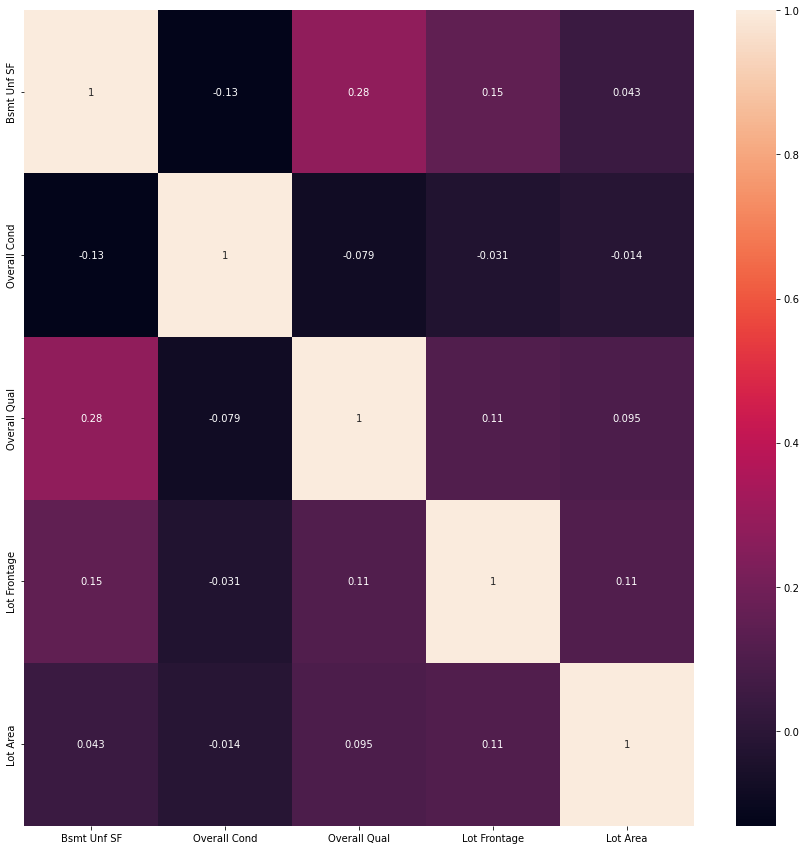

In [604]:
df_cor_test = train[['Bsmt Unf SF',
                     'Overall Cond',
                     'Overall Qual',
                     'Lot Frontage',
                     'Lot Area'
                   ]]
plt.figure(figsize=(15,15))
sns.heatmap(df_cor_test.corr(), annot=True)

<font color='blue'><b>Comparing Models</b></font></br>
Three modelling techniques were used with the following results:</br>

|Method|R-Square|RMSE|
|:---|:---|:---|
|Linear Regression|89.1|26,161|
|Lasso Regression|89.1|26,161|
|Ridge Regression|88.7|26,658|

The linear Regression was used in the Kaggle submission with the following scores:</br>
Private: 24476.54673</br>
Public: 30186.24982

<b>Linear Regression</b></br>

In [605]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)
y_reg_preds_train = model_reg.predict(X_train)
y_reg_preds_test = model_reg.predict(X_test)

In [606]:
print("Constant" + "\t   " + str(model_reg.intercept_))
pd.Series(model_reg.coef_, index = X_train.columns.values.tolist())

Constant	   64471.95307970661


Bldg Type_Duplex         -4109.033441
Bsmt Unf SF                -10.559347
BsmtFin Type 1_LwQ      -14778.859549
BsmtFin Type 1_None     -39244.919367
BsmtFin Type 1_Rec      -10576.736221
BsmtFin Type 1_Unf      -18560.154055
BsmtFin Type 2_LwQ       -8778.943115
BsmtFin Type 2_Rec       -8744.483028
Condition 1_Artery      -20316.996346
Condition 1_Feedr       -10109.450705
Condition 1_PosN         11176.061641
Exterior 1st_BrkFace     10044.802794
Exterior 1st_CemntBd     11052.016874
Exterior 2nd_HdBoard     -4833.007772
Exterior 2nd_Stucco     -11050.999533
Functional_Sev          -71104.612794
Gr Liv Area                 71.915587
Heating_OthW            -96297.264632
House Style_2Story      -16553.964694
Land Contour_Bnk        -12972.745276
Land Contour_HLS          9884.508103
Land Slope_Mod           14187.428433
Lot Config_CulDSac       10397.614814
Lot Shape_IR2            13369.405882
MS SubClass_120         -17648.150247
MS SubClass_150         -88019.839466
MS SubClass_

In [607]:
metrics.r2_score(y_train, y_reg_preds_train)

0.8911894608808034

In [608]:
#Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_train, y_reg_preds_train))

26160.834366627852

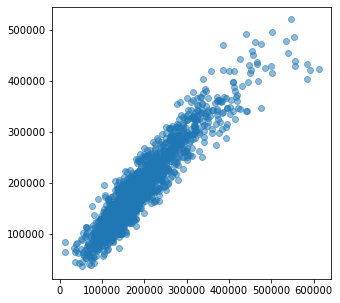

In [609]:
plt.scatter(y_train, y_reg_preds_train , alpha=0.5)
plt.show()

<AxesSubplot:>

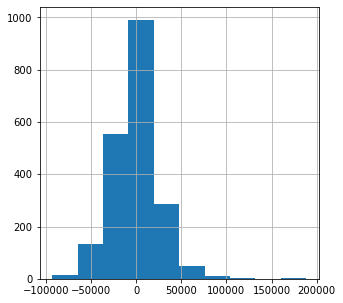

In [610]:
#Residual histogram
reg_residual = y_train - y_reg_preds_train
reg_residual.hist(bins=10)

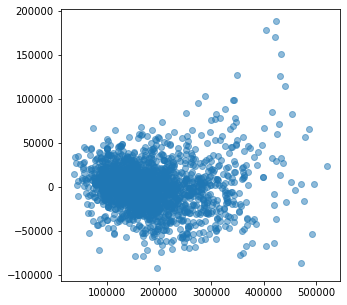

In [611]:
#Scatter Plot
plt.scatter(y_reg_preds_train, reg_residual, alpha=0.5)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

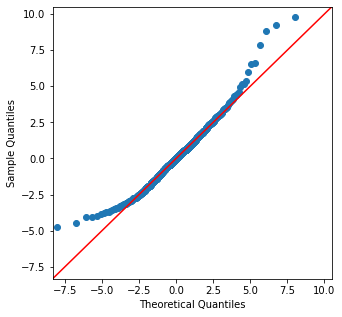

In [612]:
#Q-Q Plot
fig = sm.qqplot(reg_residual, stats.t, fit=True, line="45")

<b>Lasso Regression</b>

In [613]:
model_lasso = linear_model.Lasso(alpha=1)
model_lasso.fit(X_train, y_train)
y_lasso_preds_train = model_lasso.predict(X_train)
y_lasso_preds_test = model_lasso.predict(X_test)

In [614]:
print("Constant" + "\t   " + str(model_lasso.intercept_))
pd.Series(model_lasso.coef_, index = X_train.columns.values.tolist())

Constant	   64404.00616658127


Bldg Type_Duplex         -8207.456344
Bsmt Unf SF                -10.545242
BsmtFin Type 1_LwQ      -14763.602607
BsmtFin Type 1_None     -39149.790860
BsmtFin Type 1_Rec      -10559.190350
BsmtFin Type 1_Unf      -18553.316874
BsmtFin Type 2_LwQ       -8735.815120
BsmtFin Type 2_Rec       -8718.521449
Condition 1_Artery      -20274.802825
Condition 1_Feedr       -10083.943541
Condition 1_PosN         11123.457566
Exterior 1st_BrkFace     10042.582941
Exterior 1st_CemntBd     11009.377888
Exterior 2nd_HdBoard     -4813.481699
Exterior 2nd_Stucco     -10984.295287
Functional_Sev          -70066.027816
Gr Liv Area                 71.877308
Heating_OthW            -95283.061480
House Style_2Story      -16534.810354
Land Contour_Bnk        -12989.728765
Land Contour_HLS          9839.447295
Land Slope_Mod           14188.657435
Lot Config_CulDSac       10400.216226
Lot Shape_IR2            13348.735943
MS SubClass_120         -17593.367109
MS SubClass_150         -85911.713978
MS SubClass_

In [615]:
metrics.r2_score(y_train, y_lasso_preds_train)

0.8911879280634415

In [616]:
#Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_train, y_lasso_preds_train))

26161.018630212177

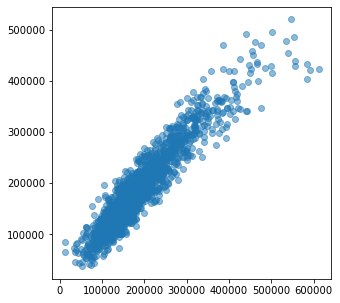

In [617]:
plt.scatter(y_train, y_lasso_preds_train , alpha=0.5)
plt.show()

<AxesSubplot:>

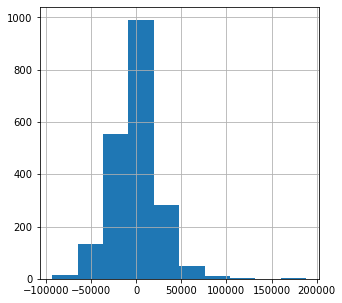

In [618]:
#Residual histogram
lasso_residual = y_train - y_lasso_preds_train
lasso_residual.hist(bins=10)

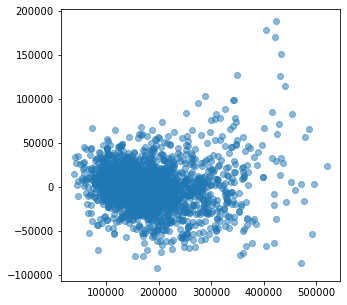

In [619]:
#Scatter Plot
plt.scatter(y_lasso_preds_train, reg_residual, alpha=0.5)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

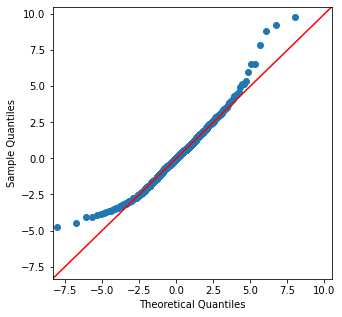

In [620]:
#Q-Q Plot
fig = sm.qqplot(lasso_residual, stats.t, fit=True, line="45")

<b>Ridge Regression</b>

In [621]:
model_ridge = linear_model.Ridge(alpha=1)
model_ridge.fit(X_train, y_train)
y_ridge_preds_train = model_ridge.predict(X_train)
y_ridge_preds_test = model_ridge.predict(X_test)

In [622]:
print("Constant" + "\t   " + str(model_ridge.intercept_))
pd.Series(model_ridge.coef_, index = X_train.columns.values.tolist())

Constant	   60315.49480484688


Bldg Type_Duplex         -4103.275359
Bsmt Unf SF                -10.055687
BsmtFin Type 1_LwQ      -14771.171221
BsmtFin Type 1_None     -36043.611776
BsmtFin Type 1_Rec      -10442.654993
BsmtFin Type 1_Unf      -18430.376119
BsmtFin Type 2_LwQ       -8295.858112
BsmtFin Type 2_Rec       -8562.849498
Condition 1_Artery      -19433.320724
Condition 1_Feedr        -9694.768425
Condition 1_PosN         11725.806787
Exterior 1st_BrkFace     11236.566088
Exterior 1st_CemntBd      9191.838715
Exterior 2nd_HdBoard     -5065.367495
Exterior 2nd_Stucco     -10707.617542
Functional_Sev          -45713.339643
Gr Liv Area                 68.866732
Heating_OthW            -63165.287950
House Style_2Story      -15164.602860
Land Contour_Bnk        -15720.025962
Land Contour_HLS         10016.458103
Land Slope_Mod           15111.314038
Lot Config_CulDSac       10955.625618
Lot Shape_IR2            13417.622020
MS SubClass_120         -17177.874694
MS SubClass_150         -43517.159124
MS SubClass_

In [623]:
metrics.r2_score(y_train, y_ridge_preds_train)

0.8870093634299738

In [624]:
#Root Mean Squared Error (RMSE)
np.sqrt(metrics.mean_squared_error(y_train, y_ridge_preds_train))

26658.599968055558

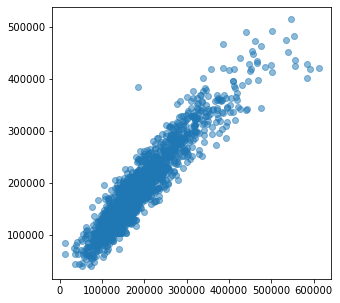

In [625]:
plt.scatter(y_train, y_ridge_preds_train, alpha=0.5)
plt.show()

<AxesSubplot:>

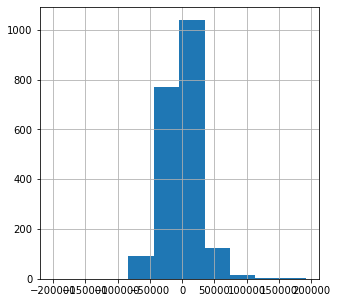

In [626]:
#Residual histogram
ridge_residual = y_train - y_ridge_preds_train
ridge_residual.hist(bins=10)

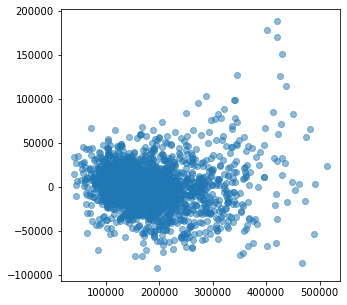

In [627]:
#Scatter Plot
plt.scatter(y_ridge_preds_train, reg_residual, alpha=0.5)
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

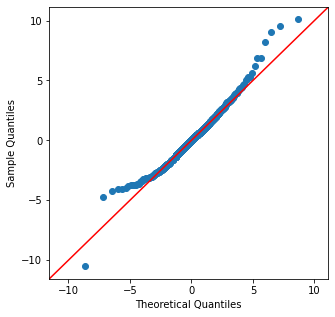

In [628]:
#Q-Q Plot
fig = sm.qqplot(ridge_residual, stats.t, fit=True, line="45")

<font color='blue'><b>Assumptions of Regression Checked</b></font></br>
While the residuals appeared to have a normal distribution, there is a fan out patterns at the higher Y predicted values. From the Q-Q Plot, most of the data are fairly linear except for the higher quantiles. The same outcome could be observed in all the three models. Potentially, more can be done to process the data to make it even better (especially for the higher values), however thinking about the objective of the analysis, this could be considered acceptable.

<b>Kaggle Submission</b>

In [629]:
for_kaggle_list  = list (zip(test.Id.values.tolist(), y_reg_preds_test))
for_kaggle = pd.DataFrame(for_kaggle_list, columns = ['Id', 'SalePrice'])

In [630]:
for_kaggle.to_csv(r'./datasets/sub_reg.csv')

<b>Obtaining Standardized Beta for Comparison</b>

In [631]:
#Standardization only on the numeric and scale data which are:
#Bsmt Unf SF, Gr Liv Area, Overall Cond, Overall Qual and Overall Qual^2

scaler = StandardScaler()
ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Bsmt Unf SF', 'Gr Liv Area','Overall Cond','Overall Qual','Overall Qual^2'])
    ], remainder='passthrough')

X_train = ct.fit_transform(X_train)

In [632]:
X_ols_train = sm.add_constant(X_train)
ols_train = sm.OLS(y_train, X_ols_train).fit()
ols_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     364.2
Date:                Fri, 28 Oct 2022   Prob (F-statistic):               0.00
Time:                        18:19:55   Log-Likelihood:                -23727.
No. Observations:                2047   AIC:                         4.755e+04
Df Residuals:                    2001   BIC:                         4.780e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.737e+05   2006.521     86.558      0.000     1.7e+05    1.78e+05
x1         -4693.3822    877.468     -5.349      0.000   -6414.229   -2972.535
x2          3.524e+04    925.525     38.077      0.000    3.34e+04    3.71e+04
x3          3591.4087    641.325      5.600      0.000    2333.675    4849.142
x4         -3.947e+04   4336.308     -9.103      0.000    -4.8e+04    -3.1e+04
x5          7.238e+04   4459.480     16.231      0.000    6.36e+04    8.11e+04
x6         -4109.0334   1692.003     -2.429      0.015   -7427.306    -790.761
x7         -1.478e+04   2816.493     -5.247      0.000   -2.03e+04   -9255.294
x8         -3.924e+04   4205.813     -9.331      0.000   -4.75e+04    -3.1e+04
x9         -1.058e+04   2244.612     -4.712      0.000    -1.5e+04   -6174.714
x10        -1.856e+04   1859.758     -9.980      0.000   -2.22e+04   -1.49e+04
x11        -8778.9431   3598.878     -2.439      0.015   -1.58e+04   -1721.003
x12        -8744.4830   3162.177     -2.765      0.006   -1.49e+04   -2542.978
x13        -2.032e+04   3316.292     -6.126      0.000   -2.68e+04   -1.38e+04
x14        -1.011e+04   2683.595     -3.767      0.000   -1.54e+04   -4846.517
x15         1.118e+04   5258.087      2.125      0.034     864.164    2.15e+04
x16         1.004e+04   3486.589      2.881      0.004    3207.077    1.69e+04
x17         1.105e+04   3093.729      3.572      0.000    4984.750    1.71e+04
x18        -4833.0078   1873.197     -2.580      0.010   -8506.628   -1159.387
x19        -1.105e+04   5023.666     -2.200      0.028   -2.09e+04   -1198.835
x20         -7.11e+04   1.91e+04     -3.729      0.000   -1.09e+05   -3.37e+04
x21         -9.63e+04   1.89e+04     -5.093      0.000   -1.33e+05   -5.92e+04
x22        -1.655e+04   1792.954     -9.233      0.000   -2.01e+04    -1.3e+04
x23        -1.297e+04   3184.340     -4.074      0.000   -1.92e+04   -6727.776
x24         9884.5081   3370.873      2.932      0.003    3273.720    1.65e+04
x25         1.419e+04   3161.695      4.487      0.000    7986.869    2.04e+04
x26          1.04e+04   2554.408      4.070      0.000    5388.037    1.54e+04
x27         1.337e+04   3786.159      3.531      0.000    5944.180    2.08e+04
x28        -1.765e+04   2761.644     -6.390      0.000   -2.31e+04   -1.22e+04
x29        -8.802e+04   2.67e+04     -3.294      0.001    -1.4e+05   -3.56e+04
x30        -1.844e+04   3774.699     -4.885      0.000   -2.58e+04    -1.1e+04
x31        -4109.0334   1692.003     -2.429      0.015   -7427.306    -790.761
x32         2.002e+04   1772.109     11.296      0.000    1.65e+04    2.35e+04
x33        -4.219e+05   2.78e+04    -15.183      0.000   -4.76e+05   -3.67e+05
x34         1.855e+04   7260.336      2.556      0.011    4315.831    3.28e+04
x35        -1.137e+04   2437.522     -4.665      0.000   -1.62e+04   -6591.889
x3